In [46]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Mixed Strategy game VI


Bilinear Objective

$$\min_\theta \max_\phi \theta P\phi$$

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]]


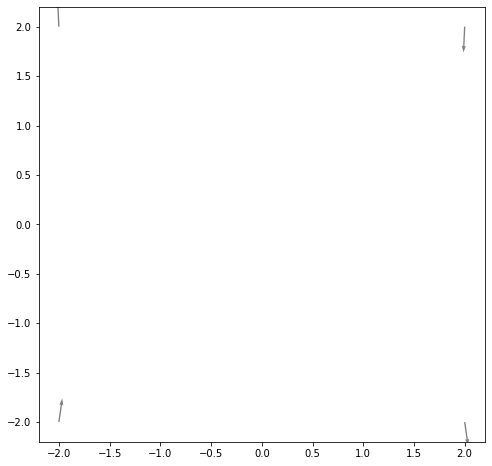

In [51]:
np.random.seed(0)
OUTPUT_PATH = 'figure'
n, m = 2, 2
""" Return coordinate matrices from coordinate vectors. """
A = np.random.rand(n,m)
print(A)
X, Y = np.meshgrid(np.linspace(-n, n, n), np.linspace(-n, n, n))
F_x = A.dot(Y)
F_y = -np.transpose(A).dot(X)
rate = 0.01#1/(4*np.linalg.norm(A, ord=3))

fig1 = plt.figure(1, figsize=(8,8))
ax1 = fig1.gca()
""" Plot the vector field, call signature: quiver([X, Y], U, V, [C], **kw)
where X, Y define the arrow locations, U, V define the arrow directions,
and C optionally sets the color. """
ax1.quiver(X, Y, F_x, F_y, units='width',color='tab:gray', width=0.003)

def grad(x, y):
    return A.dot(y), -np.transpose(A).dot(x)
    #return y, -x 

In [48]:
N_ITER = 500
INDEX = 1

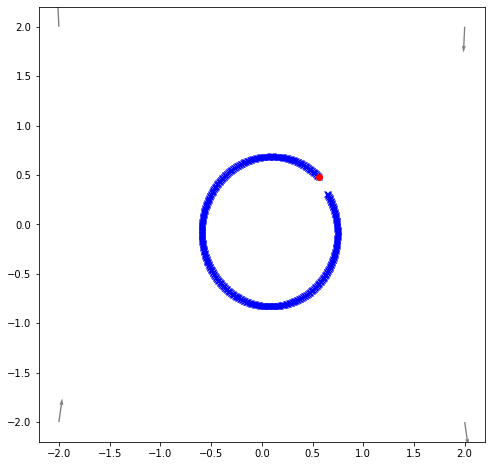

In [49]:
# Gradient Descent
np.random.seed(0)
x_rand, y_rand = np.random.uniform(size=n), np.random.uniform(size=m)
x_init, y_init = x_rand/np.sum(x_rand), y_rand/np.sum(y_rand)
x, y = x_init, y_init
#rate = 0.01
x_values, y_values = [], []
L2_norm, L1_norm = [], []

for i in range(N_ITER):
    x_grad, y_grad = grad(x, y)
    x = x - rate*(x_grad)
    x_values.append(x[INDEX])
    y = y - rate*(y_grad)
    y_values.append(y[INDEX])
    #L2_norm.append(x**2 + (x_values[i-1])**2)
    #L1_norm.append(np.abs(x-x_values[i-1]))

ax1.plot(x_values, y_values, alpha=1,linewidth=0, label='gamma=0.5$', marker='x', color='b')
ax1.plot(x_values[0], y_values[0], alpha=1, linewidth=2, label='gamma=0.5$', marker='o', color='r')
#plt.plot(L1_norm, label='gamma=0.5$')
fig1

Solution: [0.20547142 0.79452858]


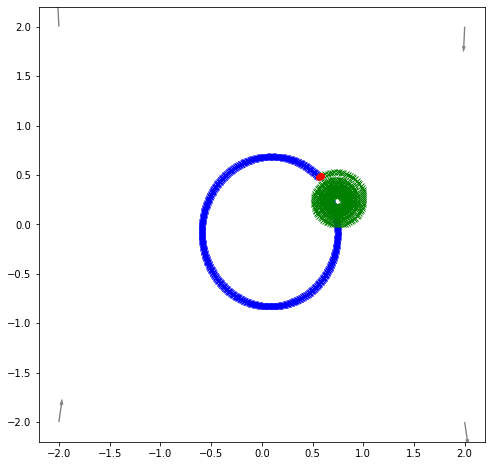

In [50]:
from projection_simplex import projection
#def projection(x, n):
#    return x

# Extragradient Descent
np.random.seed(0)
x, y = x_init, y_init
rate = 0.7
x_values, y_values = [], []
norm, L1_norm = [], []

for i in range(N_ITER):
    # Gradient step to go to an intermediate point.
    x_grad, y_grad = grad(x, y)
    x_ = projection(x - rate*(x_grad), n)
    y_ = projection(y - rate*(y_grad), n)

    # Use the gradient of the intermediate point to perform a gradient step from the
    x_grad_, y_grad_ = grad(x_, y_)
    x = projection(x - rate*(x_grad_), n)
    y = projection(y - rate*(y_grad_), n)

    x_values.append(x[INDEX])
    y_values.append(y[INDEX])

print("Solution:", x, "matlab solution: [0.2406 0.7594]")
ax1.plot(x_values, y_values, alpha=1,linewidth=0, label='gamma=0.5$', marker='x', color='g')
ax1.plot(x_values[0], y_values[0], alpha=1, linewidth=2, label='gamma=0.5$', marker='o', color='r')
fig1